In [153]:
!pip install skl2onnx onnxruntime
!pip install scikit-learn

In [154]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [155]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Summer 2024/Data Mining/Project/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Read the CSV file
data = pd.read_csv('data_public.csv')

# Explore the data
print(data.head())
print(data.info())
print(data.describe())

            A          B           C          D           E          F  \
0  231.420023 -12.210984  217.624839 -15.611916  140.047185  76.904999   
1  -38.019270 -14.195695    9.583547  22.293822  -25.578283 -18.373955   
2  -39.197085 -20.418850   21.023083  19.790280  -25.902587 -19.189004   
3  221.630408  -5.785352  216.725322  -9.900781  126.795177  85.122288   
4  228.558412 -12.447710  204.637218 -13.277704  138.930529  91.101870   

            G           H          I           J           K         L  \
0  131.591871  198.160805  82.873279  127.350084  224.592926 -5.992983   
1   -0.094457  -33.711852  -8.356041   23.792402    4.199023  2.809159   
2   -2.953836  -25.299219  -6.612401   26.285392    5.911292  6.191587   
3  108.857593  197.640135  82.560019  157.105143  212.989231 -3.621070   
4  115.598954  209.300011  89.961688  130.299732  201.795100 -1.573922   

           M           N           O  Class  
0 -14.689648  143.072058  153.439659      3  
1 -59.330681  -11.

In [157]:
class_distribution = data['Class'].value_counts()

# Print the class distribution
print("Sample Distribution:")
print(class_distribution)

Sample Distribution:
Class
3    569521
2    449885
1    180594
Name: count, dtype: int64


In [158]:
# Handle missing values
data = data.dropna()

# Check again for any remaining missing values
print(data.isnull().sum())

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64


In [159]:
# Define features and target
target_column = 'Class'
features = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
X = data[features]
y = data[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
data_train = pd.concat([X_train, y_train],axis=1)
data_train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
404339,-58.671539,-52.098653,-42.001017,-105.792450,-13.128921,-123.401355,-55.131579,-21.037372,46.196258,-89.588687,42.266072,-41.677265,-42.206388,35.307970,54.964242,1
748487,-32.317863,-17.935979,16.308127,20.578751,-25.363850,-22.611119,0.508644,-26.862913,-7.629882,31.290738,6.866344,2.743555,-56.683824,-9.895541,-0.655913,2
435951,-41.674192,-11.965151,17.782848,15.711418,-28.425641,-32.394942,0.655582,-29.632632,-4.798463,35.950519,-1.524089,3.596214,-52.662388,-6.451472,-3.331006,2
311284,-26.441902,-17.758128,9.911922,24.403660,-24.764453,-22.080280,0.194568,-23.444261,-8.992492,27.904446,3.543054,0.980881,-56.228404,-15.895130,0.746544,2
318790,240.211111,-12.528042,218.592664,-13.293689,129.634356,92.543150,148.943473,190.950463,89.152488,122.365554,200.756139,-9.805086,-20.788090,153.445304,145.805320,3


In [162]:
data_test = pd.concat([X_test, y_test],axis=1)
data_test.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
372605,-59.616874,-47.373413,-41.942991,-112.951037,-15.337376,-118.247151,-54.778162,-4.149875,48.967539,-85.797093,44.300002,-40.750378,-56.600320,23.375639,63.506354,3
551204,-59.997888,-50.522714,-41.907183,-116.664462,-15.497853,-125.052294,-53.263700,-0.261966,53.905427,-95.194122,37.914338,-41.580122,-53.245993,28.762193,59.833707,3
240320,224.438518,-10.959802,232.446545,-13.247963,143.700403,79.716592,103.218233,207.608528,72.990494,145.322858,198.591040,-1.753774,-14.990250,135.405697,135.743063,3
1047361,-56.547090,-47.726860,-48.157270,-115.236476,-12.221715,-119.989866,-53.821224,-7.296792,39.383473,-93.027629,37.185916,-39.355515,-59.190197,40.121475,57.626712,1
555362,-30.087582,-9.215506,5.776600,11.976333,-29.278097,-26.609267,0.300995,-23.548472,-6.650057,29.104345,1.109796,6.435944,-53.182079,-4.669245,-1.032898,2


In [163]:
# Define feature indices for preprocessing if needed
all_features = list(range(len(features)))

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, all_features)
    ])

# Define the model
classifier = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [166]:
# Print the classification report
print(classification_report(pipeline.predict(X_train), y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00    144405
           2       1.00      1.00      1.00    360040
           3       1.00      1.00      1.00    455555

    accuracy                           1.00    960000
   macro avg       1.00      1.00      1.00    960000
weighted avg       1.00      1.00      1.00    960000



In [167]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.38      0.37     36189
           2       0.75      0.73      0.74     89845
           3       0.59      0.59      0.59    113966

    accuracy                           0.61    240000
   macro avg       0.57      0.57      0.57    240000
weighted avg       0.62      0.61      0.61    240000



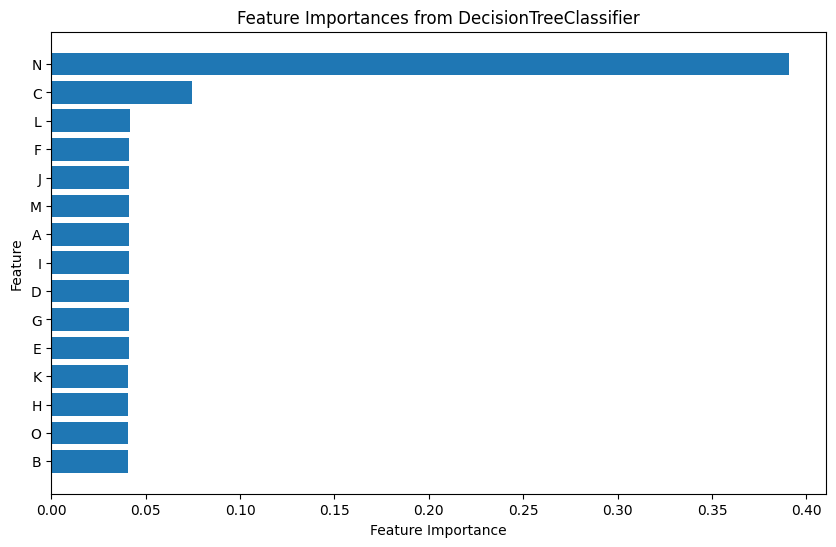

In [169]:
# Get feature importances from the classifier
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from DecisionTreeClassifier')
plt.gca().invert_yaxis()
plt.show()

In [170]:
top_n = 3  # Number of top features to select
top_features = feature_importance_df.head(top_n)['feature'].tolist()
# Ensure that the selected features are present in the dataset
X_top_features = data[top_features]

# Split the updated data
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical features
numerical_top_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_top_transformer, top_features)
    ])

# Define the model
classifier = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


# Fit the model with the top features
pipeline.fit(X_train_top, y_train_top)

# Make predictions and evaluate the updated model
y_pred_top = pipeline.predict(X_test_top)
print(classification_report(y_test_top, y_pred_top))

              precision    recall  f1-score   support

           1       0.37      0.37      0.37     36189
           2       0.75      0.74      0.74     89845
           3       0.60      0.60      0.60    113966

    accuracy                           0.62    240000
   macro avg       0.57      0.57      0.57    240000
weighted avg       0.62      0.62      0.62    240000



In [171]:
top_n = 1  # Number of top features to select
top_features = feature_importance_df.head(top_n)['feature'].tolist()

In [172]:
# Ensure that the selected features are present in the dataset
X_top_features = data[top_features]

# Split the updated data
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

In [173]:
X_train_top.head()

,N
404339,35.307970
748487,-9.895541
435951,-6.451472
311284,-15.895130
318790,153.445304


In [174]:
X_test_top.head()

,N
372605,23.375639
551204,28.762193
240320,135.405697
1047361,40.121475
555362,-4.669245


In [175]:
# Define preprocessing for numerical features
numerical_top_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create a ColumnTransformer for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_top_transformer, top_features)
    ])

# Define the model
classifier = DecisionTreeClassifier(random_state=42)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


# Fit the model with the top features
pipeline.fit(X_train_top, y_train_top)

# Make predictions and evaluate the updated model
y_pred_top = pipeline.predict(X_test_top)
print(classification_report(y_test_top, y_pred_top))

              precision    recall  f1-score   support

           1       0.37      0.38      0.37     36189
           2       0.75      0.82      0.78     89845
           3       0.63      0.57      0.60    113966

    accuracy                           0.64    240000
   macro avg       0.58      0.59      0.58    240000
weighted avg       0.63      0.64      0.63    240000



In [187]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

input_types = dict([(x, FloatTensorType([None,1])) for x in X_train_top.columns.values])

# Convert the pipeline to ONNX
try:
    onnx_model = convert_sklearn(pipeline, 'pipeline_top', initial_types=list(input_types.items()))

    # Save the ONNX model to a file
    with open('model.onnx', 'wb') as f:
        f.write(onnx_model.SerializeToString())

    print("Model successfully converted to ONNX and saved.")
except Exception as e:
    print("Error during conversion:", e)

Model successfully converted to ONNX and saved.


In [191]:
import onnxruntime as rt
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test_top.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("model.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [1 3 1 ... 3 3 3]


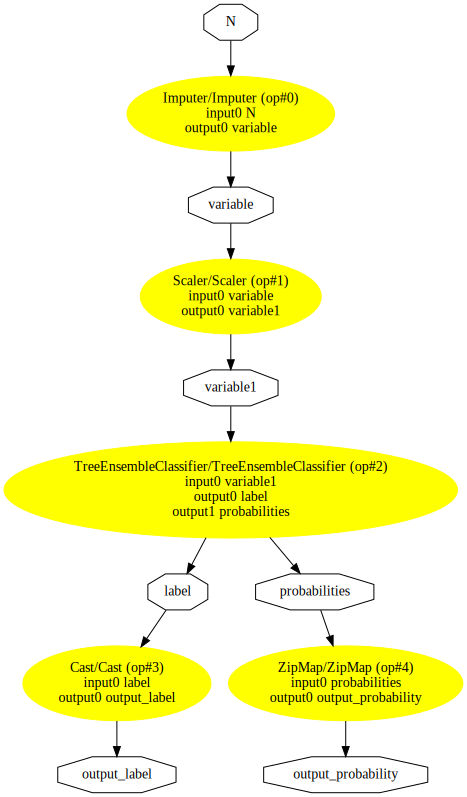

In [195]:
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz
pydot_graph = GetPydotGraph(onnx_model.graph,
                            name=onnx_model.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))

graphviz.Source(pydot_graph.to_string())